In [1]:
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
import json
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
x_train = load('x_train.joblib')
y_train = load('y_train.joblib')
x_val = load('x_val.joblib')
y_val = load('y_val.joblib')
x_test = load('x_test.joblib')
y_test = load('y_test.joblib')

In [3]:
alphas = [0.0001, 1, 10, 100, 1000, 5000]
train_errors = []
val_errors = []
for alpha in alphas:
    clf = Perceptron(alpha=alpha)
    clf.fit(x_train.reshape((x_train.shape[0], -1)), y_train)
    train_errors.append(1 - accuracy_score(y_train, clf.predict(x_train.reshape((x_train.shape[0], -1)))))
    val_errors.append(1 - accuracy_score(y_val, clf.predict(x_val.reshape((x_val.shape[0], -1)))))

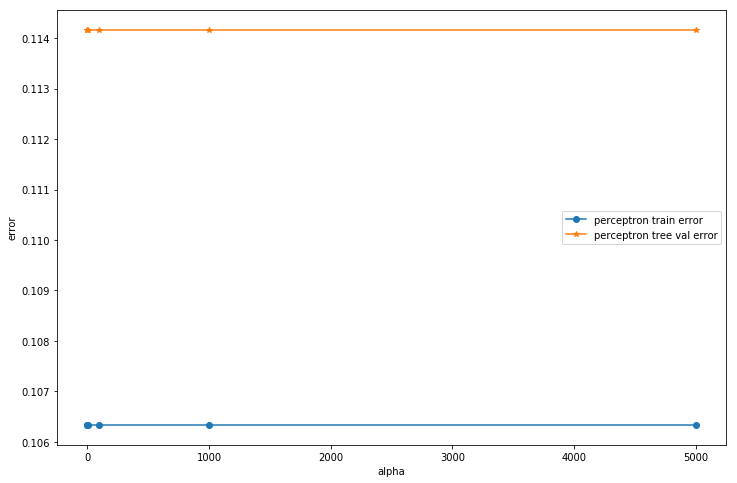

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(alphas, train_errors, label='perceptron train error', marker='o')
plt.plot(alphas, val_errors, label='perceptron tree val error', marker='*')
plt.xlabel("alpha")
plt.ylabel("error")
plt.legend()

In [6]:
clf = Perceptron()
clf.fit(x_train.reshape((x_train.shape[0], -1)), y_train)
y_pred = clf.predict(x_test.reshape((x_test.shape[0], -1)))

In [7]:
accuracy_score(y_test, y_pred)

0.89229999999999998

In [8]:
size = 100
json.dumps(y_pred[:size].tolist())

'[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 2, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 5, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]'